\usepackage[utf8]{inputenc}
\usepackage{cancel}
\usepackage{amsthm,amssymb,amsmath}
\usepackage{mathtools}

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [84]:
%matplotlib inline

In [97]:
# Load in the data from CSV
df = pd.read_csv('cc015-514-2.csv')

# Select first 3 days of data (4320 minutes)
df = df[df["Minutes"] <= 4320]

In [98]:
# Drop entries with missing data
df.dropna()

,Minutes,Date,Time,Temp,Acitivity
2,3,20/1/16,14:42:55,38.13,46.0
3,4,20/1/16,14:43:55,38.13,47.0
4,5,20/1/16,14:44:55,38.09,11.0
5,6,20/1/16,14:45:55,38.01,32.0
6,7,20/1/16,14:46:55,38.04,44.0
...,...,...,...,...,...
4315,4316,20/1/19,14:35:55,36.76,3.0
4316,4317,20/1/19,14:36:55,36.84,45.0
4317,4318,20/1/19,14:37:55,36.90,15.0
4318,4319,20/1/19,14:38:55,36.94,3.0


In [99]:
t = df["Minutes"]
y = df["Temp"]

mask = y>0
t = t[mask]
y = y[mask]

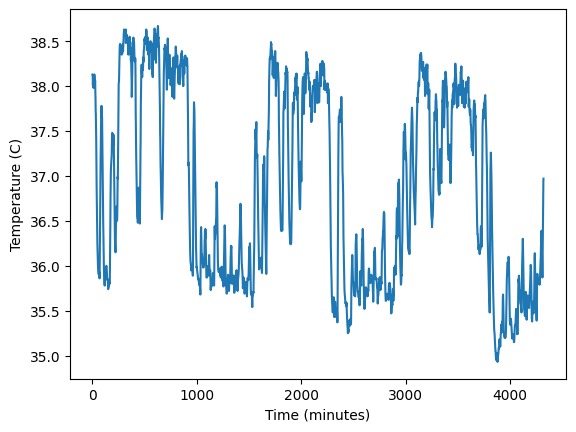

In [88]:
fig,ax = plt.subplots()
ax.set_xlabel("Time (minutes)")
ax.set_ylabel("Temperature (C)")

ax.plot(t, y, label="Temperature")

Looking at the $\textit{wavy}$ nature of the cure we will choose the following starting basis for our regressional approach.
\begin{equation*}
\{1, \sin{x}, \cos{x}\}
\end{equation*}


In [89]:
# for pandas dataframes, 
# while the variables **appear**
# as columns, internally they are rows.
# so, we need to build up the matrix in 
# rows, (vstack="vertical stack") then 
# take its transpose.
A = np.vstack([
    np.ones(t.shape), 
    t**2*np.sin(t*(2*np.pi)),
    np.cos(t*(2*np.pi))
    ])

In [100]:
A = np.vstack([np.ones(t.shape),
    np.sin(t*(2*np.pi)/1600),
    np.cos(t*(2*np.pi)/1600),
    ])

In [101]:
# transpose
A = A.T

In [102]:
# least squares regression for best fit
solver_output = np.linalg.lstsq(A, y, rcond=None)
a = solver_output[0]

In [103]:
a

array([36.81411651,  0.91190058,  0.19830135])

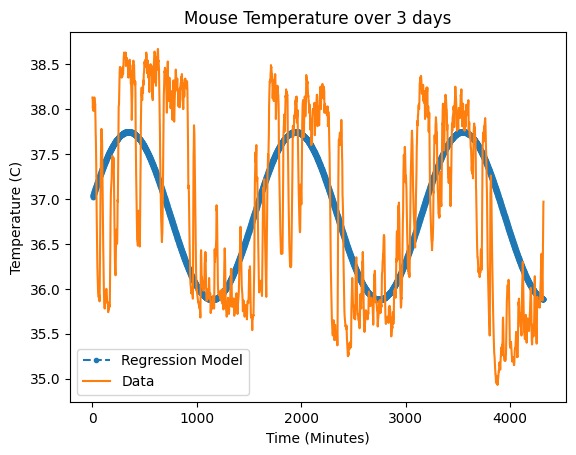

In [111]:
# plot the best fit model prediction
plt.xlabel("Time (Minutes)")
plt.ylabel("Temperature (C)")
plt.title("Mouse Temperature over 3 days")
plt.plot(t, np.dot(A, a), '--.',label="Regression Model")
plt.plot(t, y, label="Data")
plt.legend()
plt.savefig("mouse.png")

In [ ]:
# Load in the data from CSV
df = pd.read_csv('cc015-514-2.csv')

# Select after first 3 days of data (4320 minutes)
df = df[df["Minutes"] >= 4320]

In [ ]:
# Drop entries with missing data
df.dropna()

,Minutes,Date,Time,Temp,Acitivity
4319,4320,20/1/19,14:39:55,36.97,28.0
4320,4321,20/1/19,14:40:55,36.98,43.0
4321,4322,20/1/19,14:41:55,36.94,28.0
4322,4323,20/1/19,14:42:55,36.88,2.0
4323,4324,20/1/19,14:43:55,36.79,8.0
...,...,...,...,...,...
16891,16892,20/1/28,8:11:55,33.55,0.0
16892,16893,20/1/28,8:12:55,33.55,0.0
16893,16894,20/1/28,8:13:55,33.55,0.0
16894,16895,20/1/28,8:14:55,33.56,2.0


In [ ]:
t = df["Minutes"]
y = df["Temp"]
mask = y>0
t = t[mask]
y = y[mask]

In [ ]:
reg = lambda x : a[0] + a[1]*np.sin(x*(2*np.pi)/1600) + a[2]*np.cos(x*(2*np.pi)/1600)

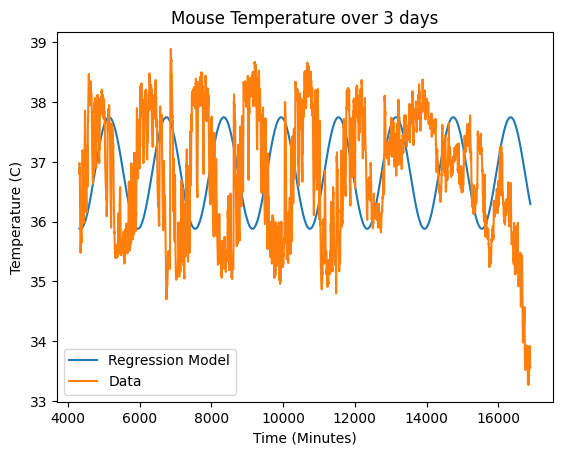

In [ ]:
# plot the best fit model prediction
plt.xlabel("Time (Minutes)")
plt.ylabel("Temperature (C)")
plt.title("Mouse Temperature over 3 days")
plt.plot(t, reg(t), label="Regression Model")
plt.plot(t, y, label="Data")
plt.legend()
plt.savefig("mouse2.png")

In [ ]:
# Load in the data from CSV
df = pd.read_csv('cc015-514-2.csv')

In [ ]:
# Drop entries with missing data
df.dropna()

In [ ]:
epsilons = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
numOfAnomalies = []

for epsilon in epsilons:
    error = np.abs(y - reg(t))
    sum = error[error>epsilon].count()
    numOfAnomalies.append(sum)

print(numOfAnomalies)


[12521, 11917, 11299, 10654, 10101, 9538, 8864, 8200, 7619, 7103, 6677]
